In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.vision.gan import *

In [3]:
path = Path('../input/pokemon-ab-merged/pokemon-merged')
# path1 = Path("../input/kaggle-one-shot-pokemon/kaggle-one-shot-pokemon/pokemon-a")
# path2 = Path("../input/kaggle-one-shot-pokemon/kaggle-one-shot-pokemon/pokemon-b")

In [4]:
# tfms = get_transforms(flip_vert = False)

In [5]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
#                .transform(tfms=None, size=size, tfm_y=True)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [6]:
data = get_data(128, 64)

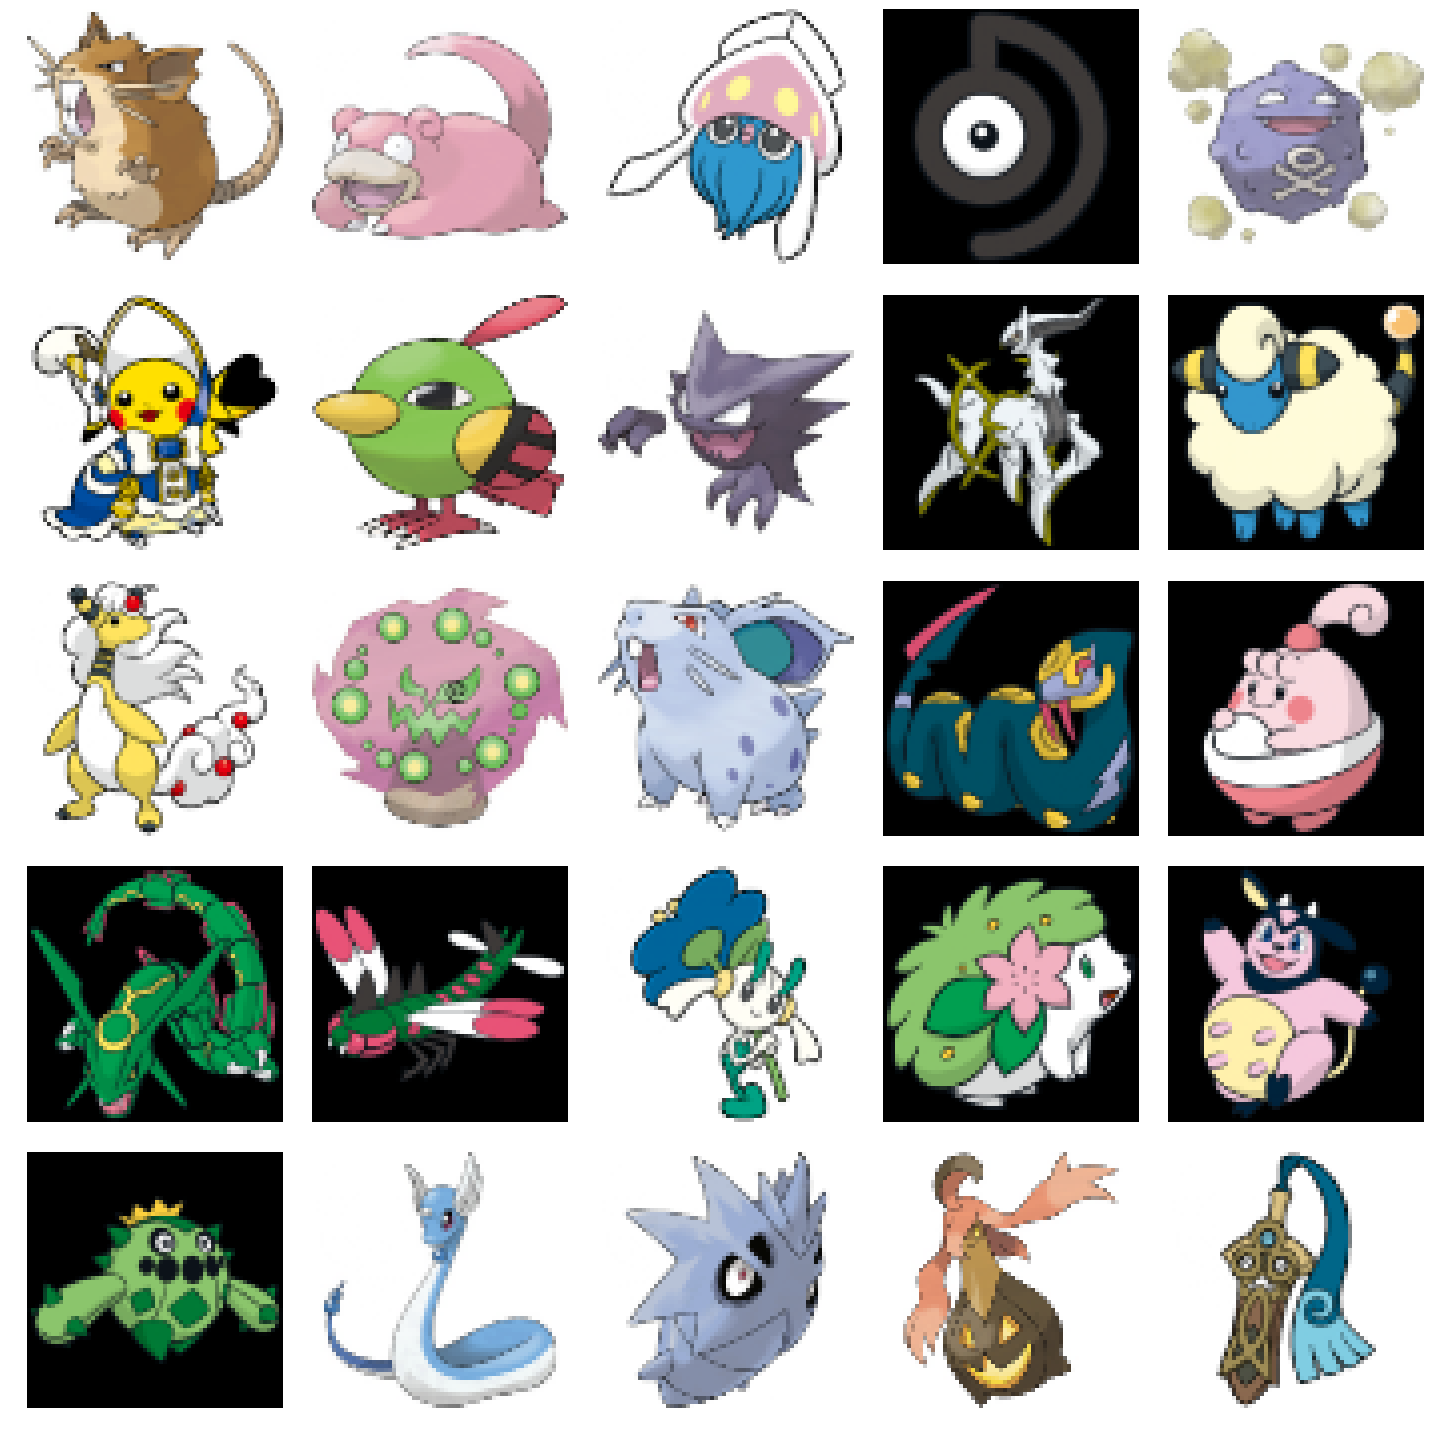

In [7]:
data.show_batch(rows=5)

In [8]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [9]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0., model_dir='/tmp/models')

In [10]:
!wget https://www.dropbox.com/s/ruse1u23mq4izj5/64pokemon_900epoch.pth
learn.load('/kaggle/working/64pokemon_900epoch')

--2019-08-03 16:44:26--  https://www.dropbox.com/s/ruse1u23mq4izj5/64pokemon_900epoch.pth
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ruse1u23mq4izj5/64pokemon_900epoch.pth [following]
--2019-08-03 16:44:26--  https://www.dropbox.com/s/raw/ruse1u23mq4izj5/64pokemon_900epoch.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5c06588a29c22316bb0d948f2e.dl.dropboxusercontent.com/cd/0/inline/Al5Kk12GNwN9mR9XxvAXiLDBTZREi3NCntLDgA1Rxofnh61m8jlUj4cfXMXyld5WTCjUiETa8WBuGrX8w-IOv3ULBzSyHXf_xtVq9GmNch-07PXaT_coZS2faAS7y6iAFSQ/file# [following]
--2019-08-03 16:44:27--  https://uc5c06588a29c22316bb0d948f2e.dl.dropboxusercontent.com/cd/0/inline/Al5Kk12GNwN9mR9XxvAXiLDBTZREi3NCntLDgA1Rxofnh61m8jlUj4cfXMXyld5WTCjUiETa8WBuGrX8w-IO

GANLearner(data=ImageDataBunch;

Train: LabelList (1758 items)
x: GANItemList
,,,,
y: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
Path: ../input/pokemon-ab-merged/pokemon-merged;

Valid: LabelList (0 items)
x: GANItemList

y: ImageList

Path: ../input/pokemon-ab-merged/pokemon-merged;

Test: None, model=GANModule(
  (generator): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): ReLU(inplace)
      (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): ReLU(inplace)
      (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1

In [11]:
# learn.lr_find(stop_div=False, num_it=200)
# learn.recorder.plot(suggestion=True)

# LR finder produced a result of 
# Min numerical gradient: 9.12E-04
# Min loss divided by 10: 4.37E-04

# https://i.imgur.com/rBRCqjW.png
# https://i.imgur.com/8rs6xem.png

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.000463,#na#,-0.004063,-0.000272,00:24
1,0.005475,#na#,0.030930,-0.000165,00:23
2,0.004767,#na#,0.030602,-0.000416,00:26
3,-0.000841,#na#,0.017343,-0.003438,00:27
4,-0.000894,#na#,0.012160,-0.002194,00:24
5,-0.008331,#na#,-0.018729,-0.002130,00:23
6,-0.007233,#na#,-0.019061,-0.002104,00:24
7,-0.004633,#na#,-0.017584,-0.000427,00:24
8,-0.004103,#na#,-0.017221,-0.000422,00:24
9,-0.001523,#na#,-0.009958,-0.000570,00:24


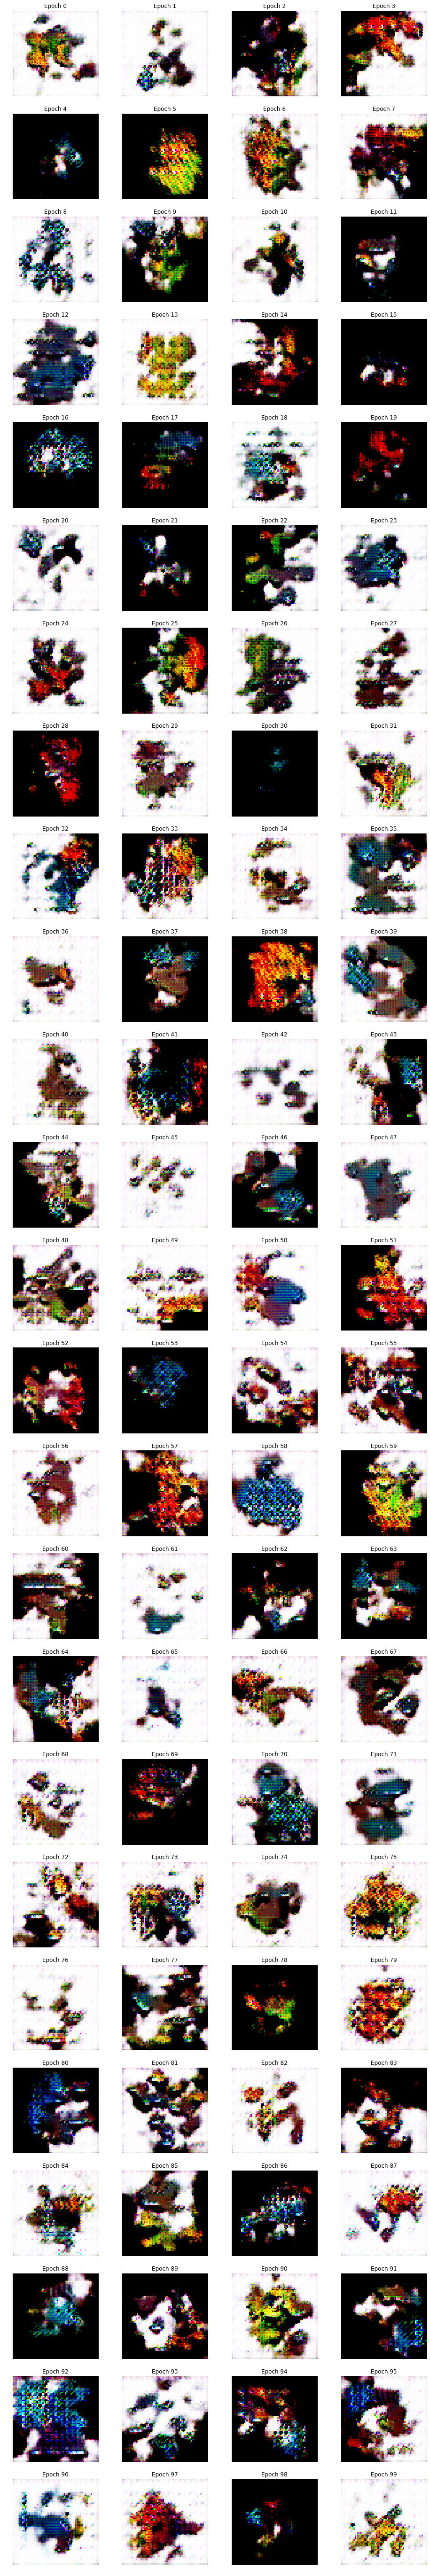

In [12]:
learn.fit(100,9.12E-04)

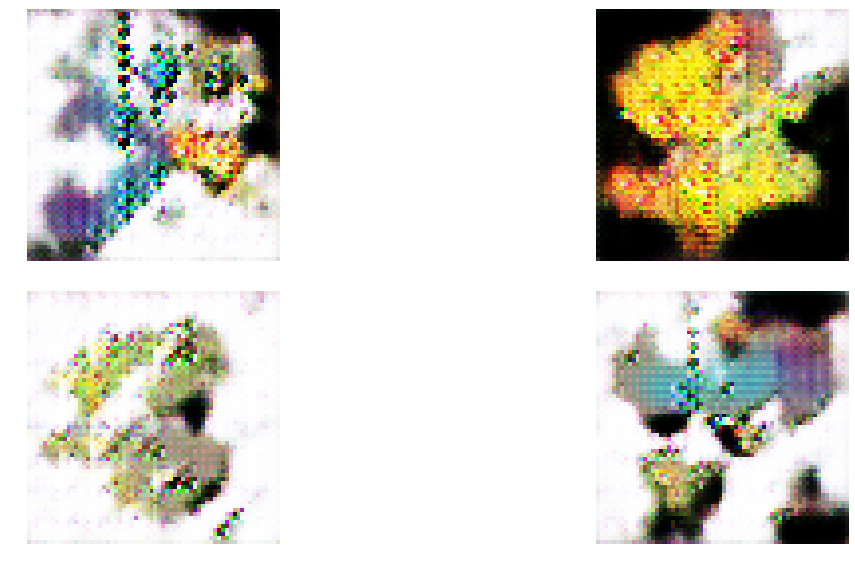

In [13]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=2, columns=8, figsize=(20,8))

In [14]:
learn.save('/kaggle/working/64pokemon_1000epoch')